In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid", {"grid.color": ".4", "grid.linestyle": ":"})
from scipy import stats

In [2]:
# df=pd.read_csv("https://raw.githubusercontent.com/sunnysavita10/Statistics-With-Python-TheCompleteGuide/main/googleplaystore.csv")
# df.to_csv('googleplaystore.csv',index=False,header=True)
df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [4]:
df.shape

(10841, 13)

In [5]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df[df.duplicated()].shape

(483, 13)

In [9]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
df_copy=df.copy()
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
df_copy['Size'].replace('Varies with device',np.nan,inplace=True)
df_copy[['Size_num','Size_Unit']]=df_copy['Size'].str.extract(r'(\d+\.\d+|\d+)([a-zA-Z+*-/])?')


In [12]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_num,Size_Unit
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,M
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25,M
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,M


In [13]:
# df_copy[['Review_num','Review_Unit']]=df_copy['Reviews'].str.extract(r'(\d+\.\d+|\d+)([a-zA-Z])?')
df_copy.drop(10472,inplace=True)
df_copy['Reviews']=df_copy['Reviews'].astype('int')
df_copy.shape

(10840, 15)

In [14]:
df_copy.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_num           object
Size_Unit          object
dtype: object

In [15]:
df_copy.Size_Unit.value_counts()

M    8829
k     316
Name: Size_Unit, dtype: int64

In [16]:
# df_copy[['Review_num','Size_num']]=df_copy[['Review_num','Size_num']].astype('float')
df_copy['Size_num']=df_copy['Size_num'].astype('float')

df_copy['Size_Unit']=df_copy['Size_Unit'].map({'M':1000,'k':1})

In [17]:
df_copy['Size']=df_copy['Size_num']*df_copy['Size_Unit']
    


In [18]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_num,Size_Unit
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,1000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,1000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,1000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,1000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,1000.0


In [19]:
df_copy['Price']=df_copy['Price'].replace('[a-zA-Z!@#$%^&*-+*/]','',regex=True).astype(float)
# df_copy['Price']=df_copy['Price']
df_copy['Installs']=df_copy['Installs'].replace('Free',np.nan)

df_copy['Installs']=df_copy['Installs'].replace('[,+]','',regex=True).astype('float')
df_copy.drop(['Size_num','Size_Unit'],axis=1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [20]:
df_copy['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [21]:
df_copy.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_num          float64
Size_Unit         float64
dtype: object

In [22]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])

In [23]:
df_copy['Last_Update_Year']=df_copy['Last Updated'].dt.year
df_copy['Last_Update_Month']=df_copy['Last Updated'].dt.month
df_copy['Last_Update_Day']=df_copy['Last Updated'].dt.day

In [24]:
df_copy['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [25]:
df_copy.to_csv('cleaned_googleplaystore.csv',index=False,header=True)

In [26]:
data=pd.read_csv('cleaned_googleplaystore.csv')

In [27]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_num,Size_Unit,Last_Update_Year,Last_Update_Month,Last_Update_Day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0,1000.0,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0,1000.0,2018,1,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7,1000.0,2018,8,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25.0,1000.0,2018,6,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2.8,1000.0,2018,6,20


In [28]:
data.isna().sum()

App                     0
Category                0
Rating               1474
Reviews                 0
Size                 1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             8
Android Ver             2
Size_num             1695
Size_Unit            1695
Last_Update_Year        0
Last_Update_Month       0
Last_Update_Day         0
dtype: int64

In [29]:
data.shape

(10840, 18)

In [30]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [31]:
data['Rating'].fillna(data['Rating'].median(),inplace=True)

In [32]:
data.isna().sum()

App                     0
Category                0
Rating                  0
Reviews                 0
Size                 1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             8
Android Ver             2
Size_num             1695
Size_Unit            1695
Last_Update_Year        0
Last_Update_Month       0
Last_Update_Day         0
dtype: int64

In [33]:
data.drop_duplicates(inplace=True,keep='first')

In [34]:
data.isna().sum()

App                     0
Category                0
Rating                  0
Reviews                 0
Size                 1526
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             8
Android Ver             2
Size_num             1526
Size_Unit            1526
Last_Update_Year        0
Last_Update_Month       0
Last_Update_Day         0
dtype: int64

In [35]:
data.shape

(10357, 18)

In [36]:
data.dropna(inplace=True)

In [37]:
data.shape

(8821, 18)

In [38]:
data[data['App'].duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_num,Size_Unit,Last_Update_Year,Last_Update_Month,Last_Update_Day
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.0,100000000.0,Free,0.0,Everyone,Business,2018-08-02,9.7.14188,4.1 and up,35.0,1000.0,2018,8,2
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000.0,500000000.0,Free,0.0,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up,11.0,1000.0,2018,6,8
408,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36893,4000.0,1000000.0,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,4.0,1000.0,2018,7,6
419,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648480,3300.0,100000000.0,Free,0.0,Teen,Communication,2018-07-18,11.4.0,4.0 and up,3.3,1000.0,2018,7,18
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40000.0,500000000.0,Free,0.0,Teen,Communication,2018-08-02,12.8.5.1121,4.0 and up,40.0,1000.0,2018,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10645,Podcast App: Free & Offline Podcasts by Player FM,NEWS_AND_MAGAZINES,4.6,66407,19000.0,1000000.0,Free,0.0,Teen,News & Magazines,2018-07-25,4.1.0.72,4.0 and up,19.0,1000.0,2018,7,25
10714,FarmersOnly Dating,DATING,3.0,1145,1400.0,100000.0,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,1.4,1000.0,2016,2,25
10719,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4000.0,1000000.0,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,4.0,1000.0,2018,7,6
10729,FP Notebook,MEDICAL,4.5,410,60000.0,50000.0,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,60.0,1000.0,2018,3,24


In [39]:
data=data.drop_duplicates(subset='App',keep='first')

In [40]:
data.shape

(8424, 18)

In [41]:
data.drop(['Size_num','Size_Unit','Last Updated'],axis=1,inplace=True)

In [42]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last_Update_Year,Last_Update_Month,Last_Update_Day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018,1,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,2018,8,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,2018,6,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,2018,6,20


In [43]:
data.dtypes

App                   object
Category              object
Rating               float64
Reviews                int64
Size                 float64
Installs             float64
Type                  object
Price                float64
Content Rating        object
Genres                object
Current Ver           object
Android Ver           object
Last_Update_Year       int64
Last_Update_Month      int64
Last_Update_Day        int64
dtype: object

In [44]:
num_cols=[col for col in data.columns if (data[col].dtype)!='O']
cat_cols=[col for col in data.columns if (data[col].dtype)=='O']


In [45]:
num_cols

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Last_Update_Year',
 'Last_Update_Month',
 'Last_Update_Day']

In [46]:
cat_cols

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [47]:
for i in cat_cols:
    print(f"{i} has unique value of {len(data[i].unique())} \n Unique Valies are ---> \n {data[i].unique()}\n\n")

App has unique value of 8424 
 Unique Valies are ---> 
 ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Fr. Mike Schmitz Audio Teachings' 'Parkinson Exercices FR'
 'iHoroscope - 2018 Daily Horoscope & Astrology']


Category has unique value of 33 
 Unique Valies are ---> 
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Type has unique value of 2 
 Unique Valies are ---> 
 ['Free' 'Paid']


Content Rating has unique value of 6 
 Unique Valies are ---> 
 ['Everyone' 'Teen' 'Everyone 10+' 'Mat

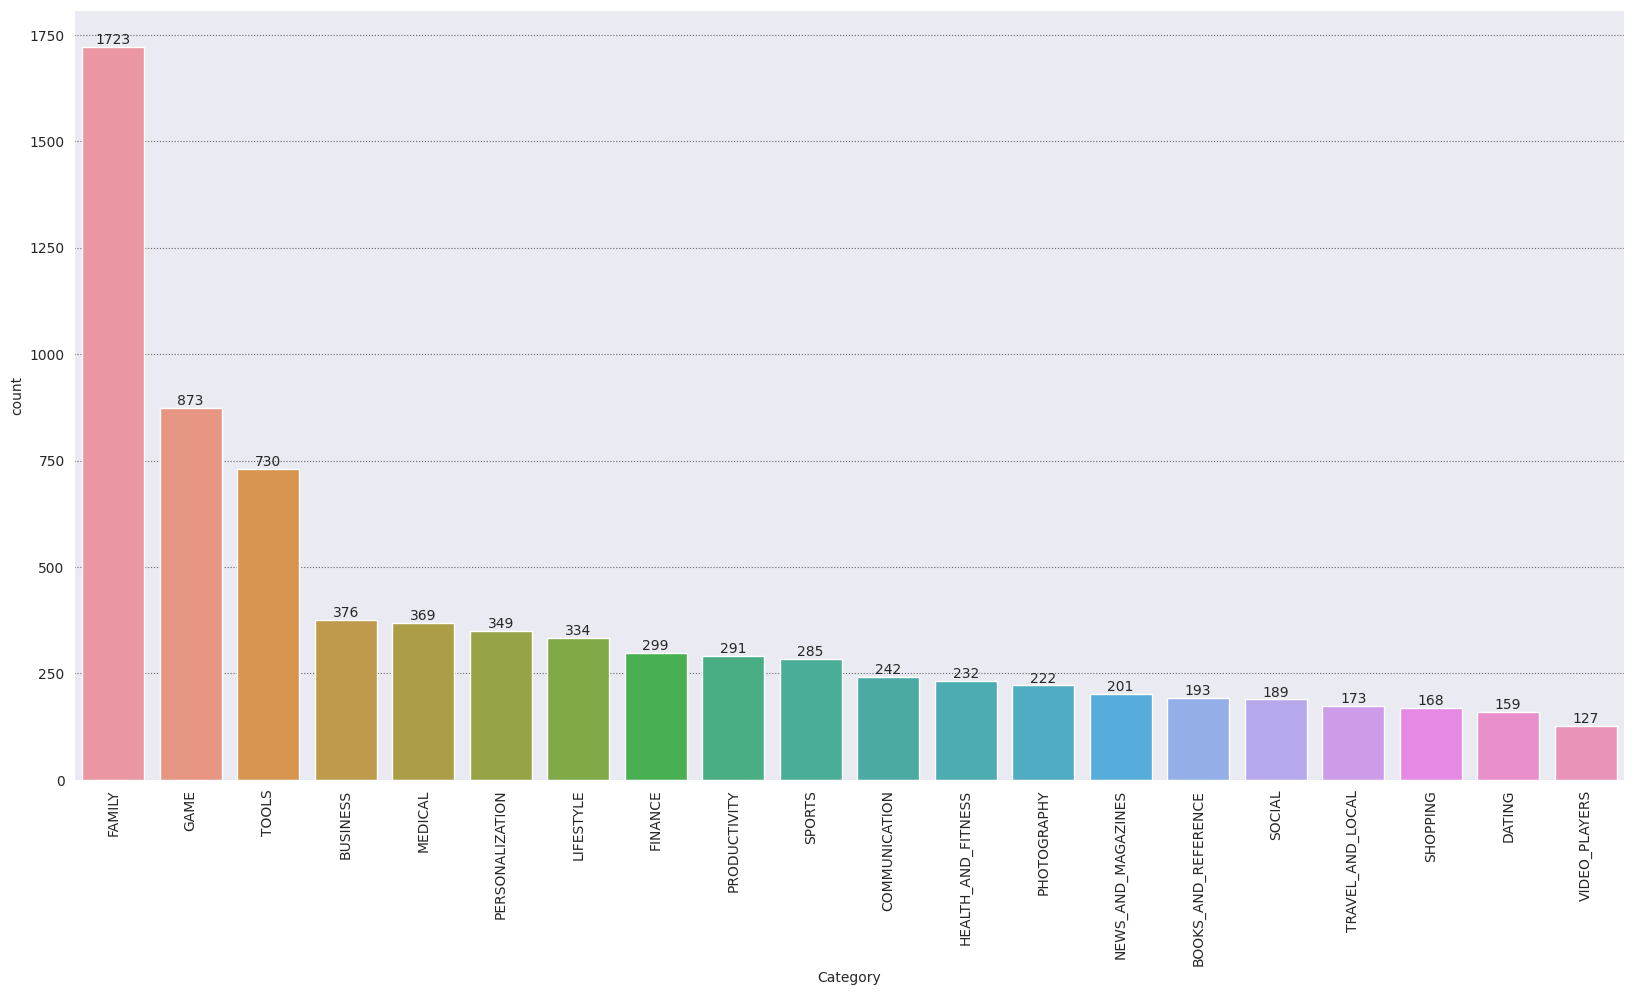

In [48]:
plt.figure(figsize=(20,10))
plot=sns.countplot(data=data,x='Category',order=data.Category.value_counts().iloc[:20].index)
plt.bar_label(plot.containers[0])
plt.xticks(rotation=90);

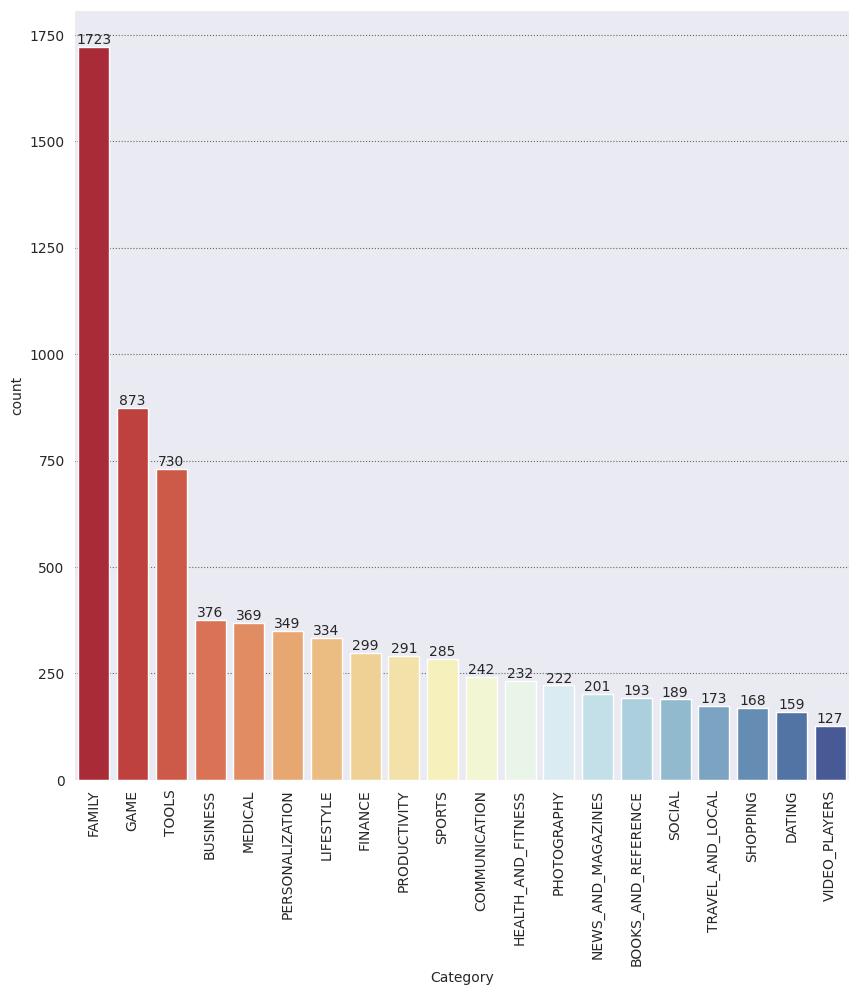

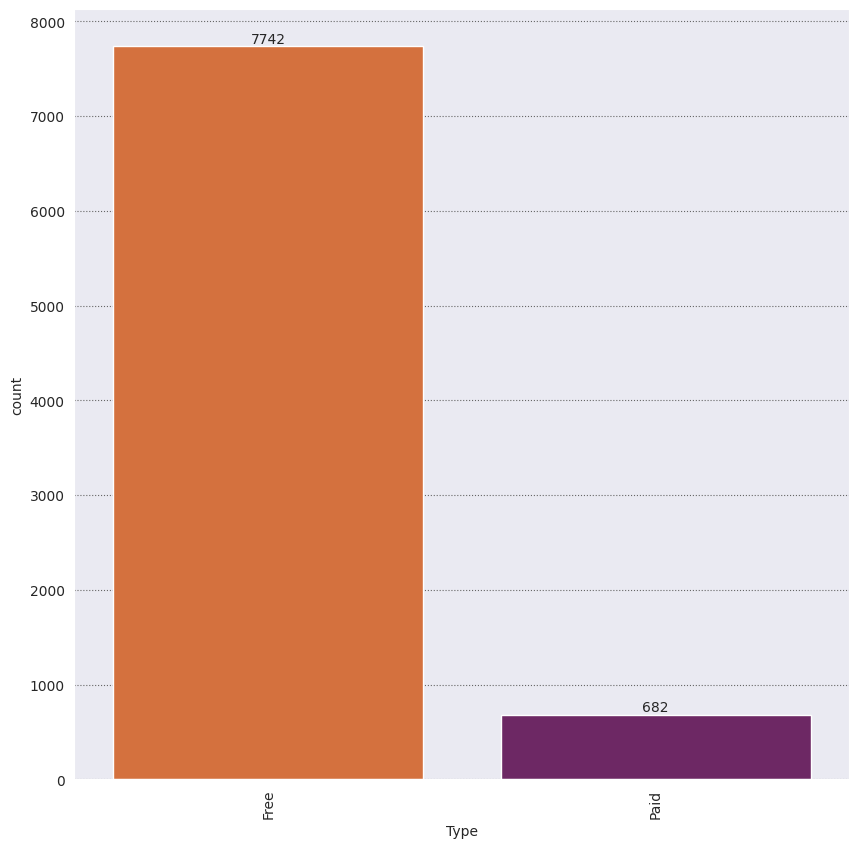

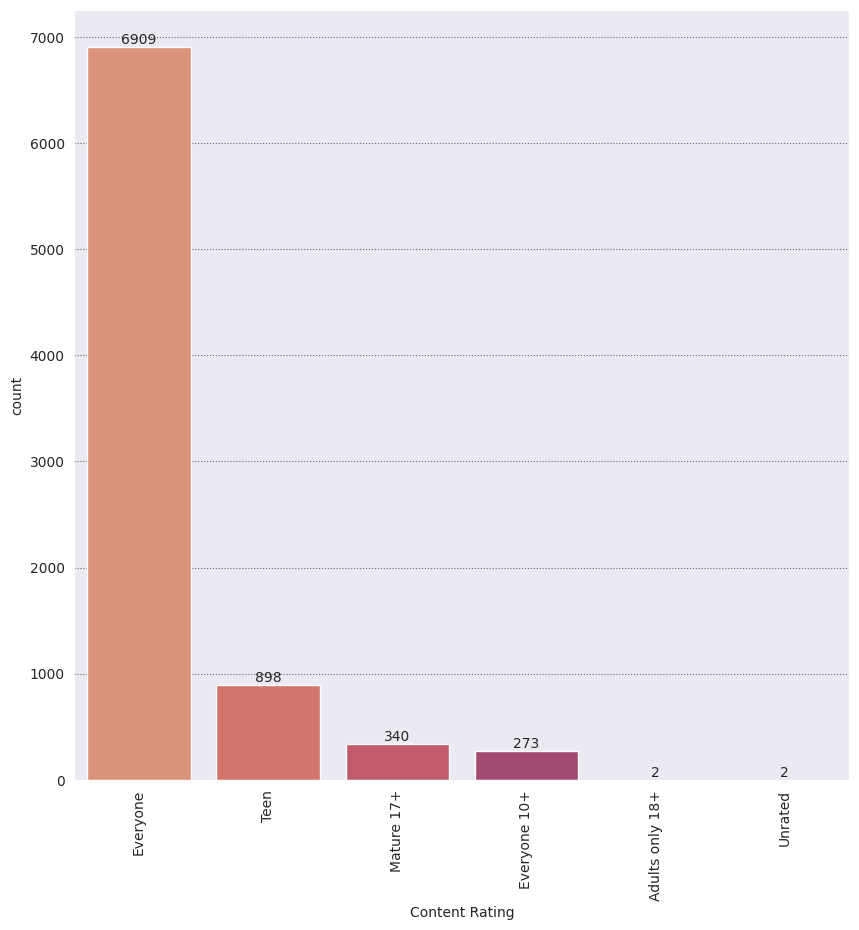

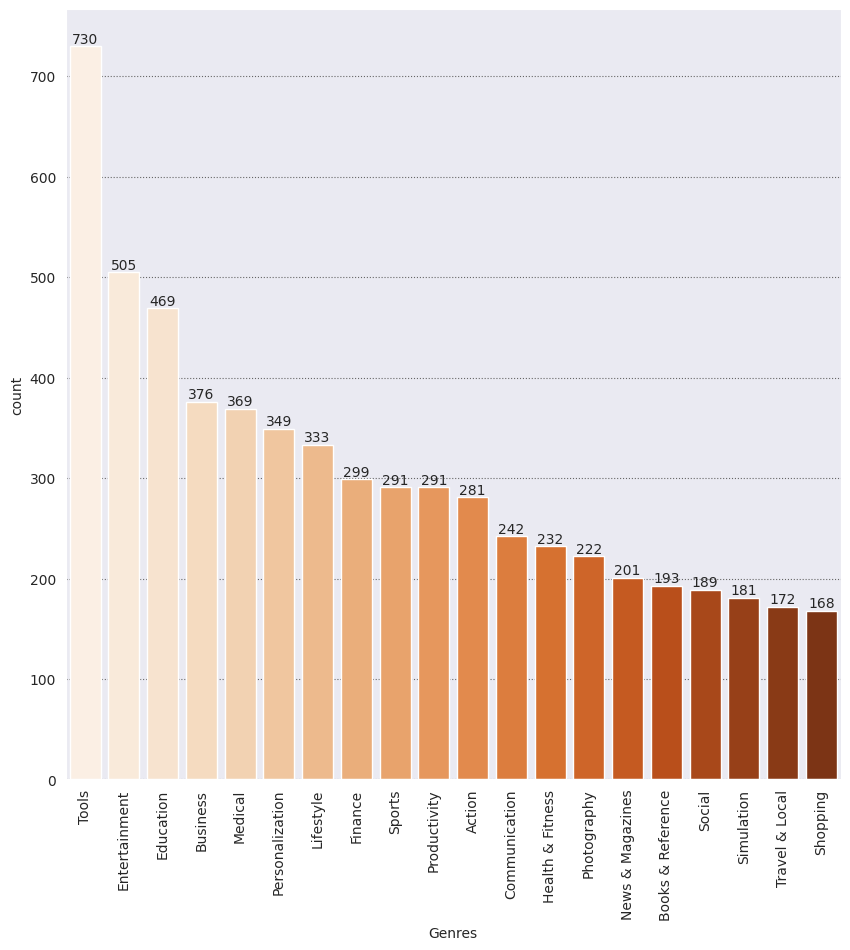

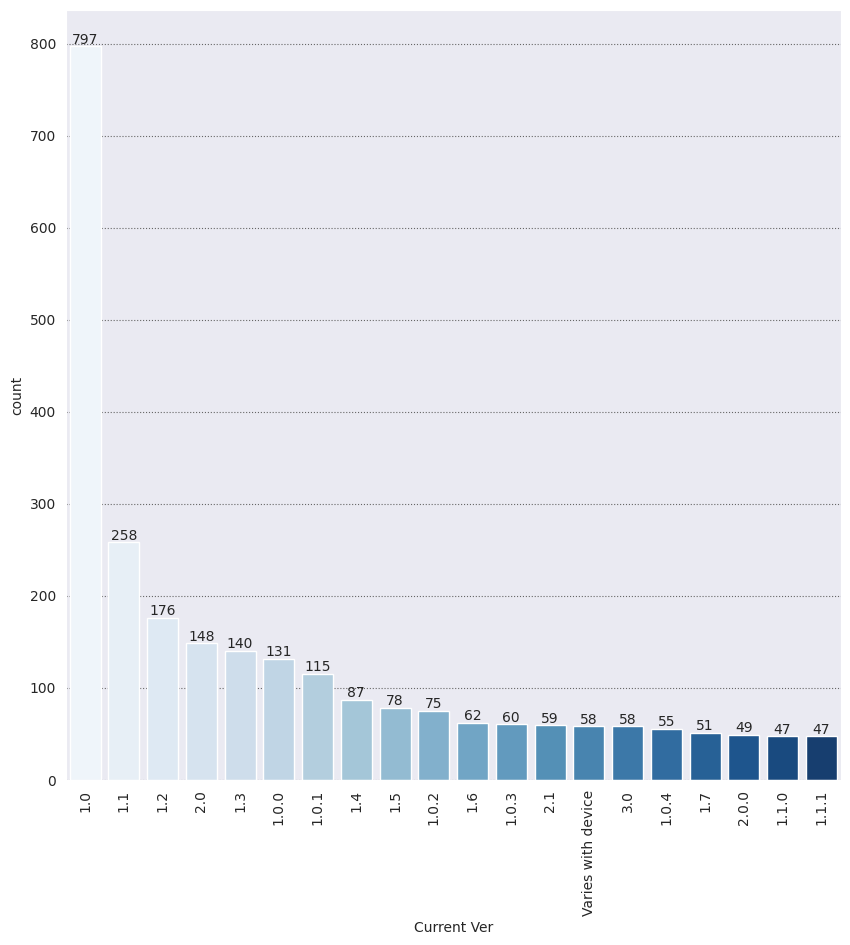

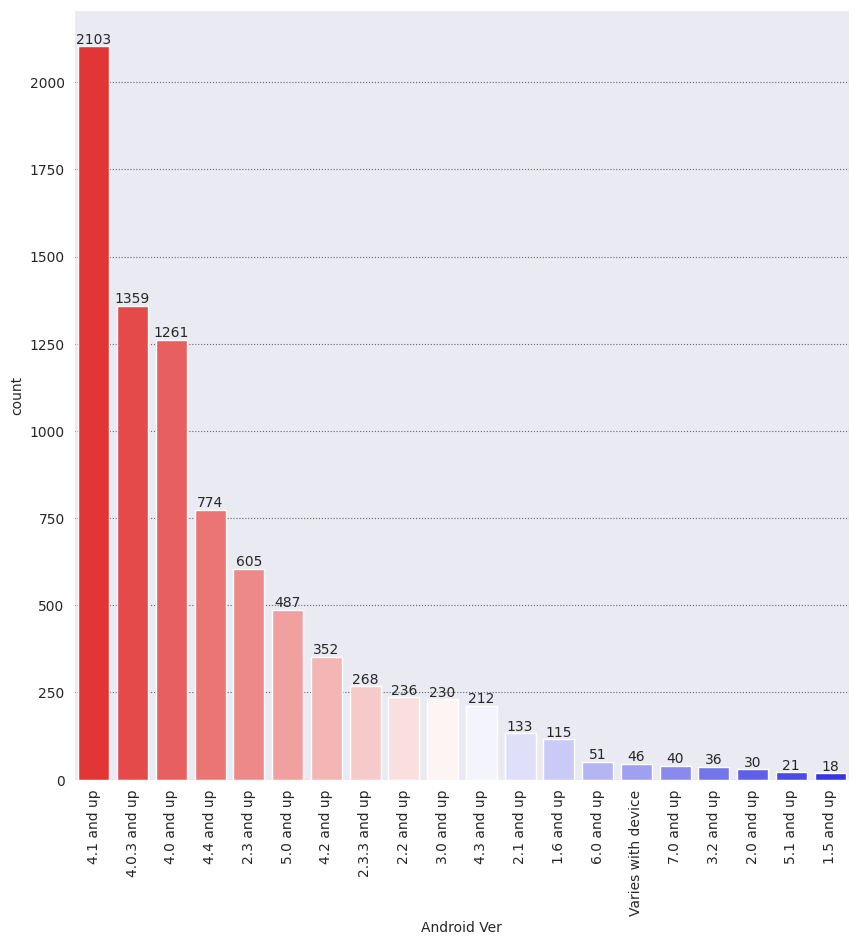

In [49]:
import random
cmaps=plt.colormaps()
for i in cat_cols:
    if i=='App':
        continue
    else:
        plt.figure(figsize=(10,10))
        plot=sns.countplot(data=data,x=i,order=data[i].value_counts().sort_values(ascending=False).iloc[:20].index,palette=random.choice(cmaps))
        plt.bar_label(plot.containers[0])
        plt.xticks(rotation=90)
        plt.show();

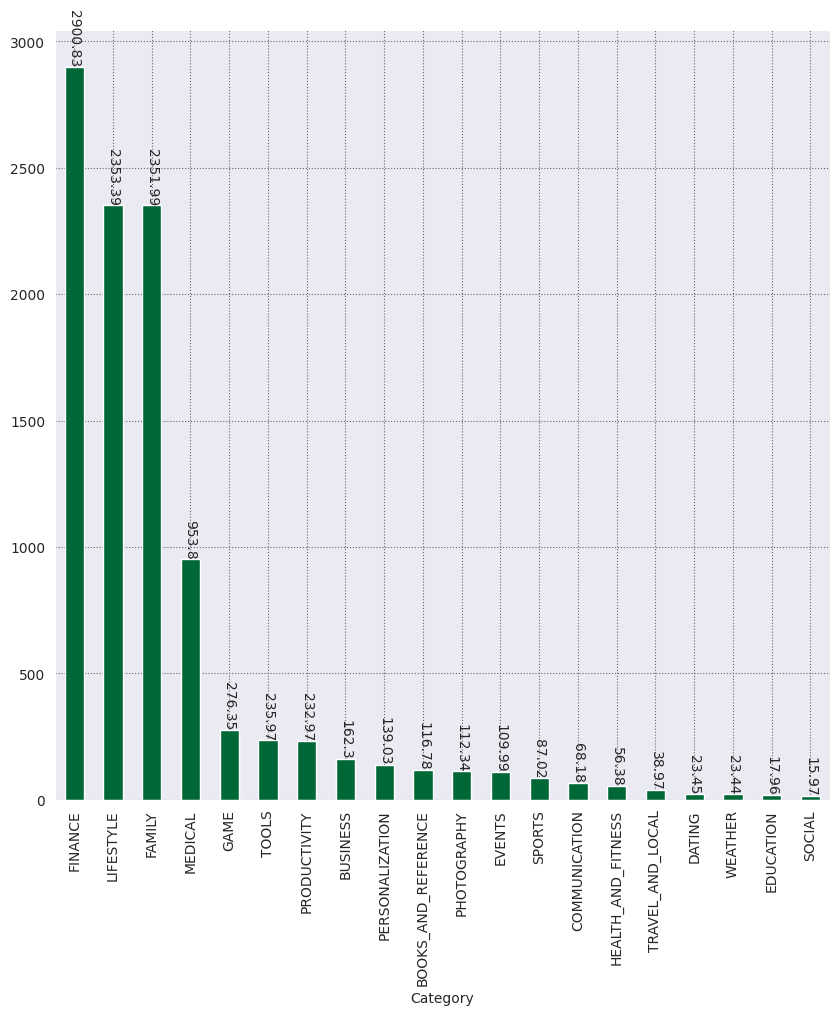

In [53]:
plt.figure(figsize=(10,10))
plot=data.groupby('Category')['Price'].sum().nlargest(20).plot(kind='bar',cmap=random.choice(cmaps))

plt.bar_label(plot.containers[0],rotation=270)
plt.xticks(rotation=90);

In [54]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Last_Update_Year', 'Last_Update_Month', 'Last_Update_Day'],
      dtype='object')

/tmp/ipykernel_18094/2692978153.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot=sns.barplot(data=data,x='Category',y='Installs',order=data['Category'].value_counts().nlargest(15).index,ci=None)


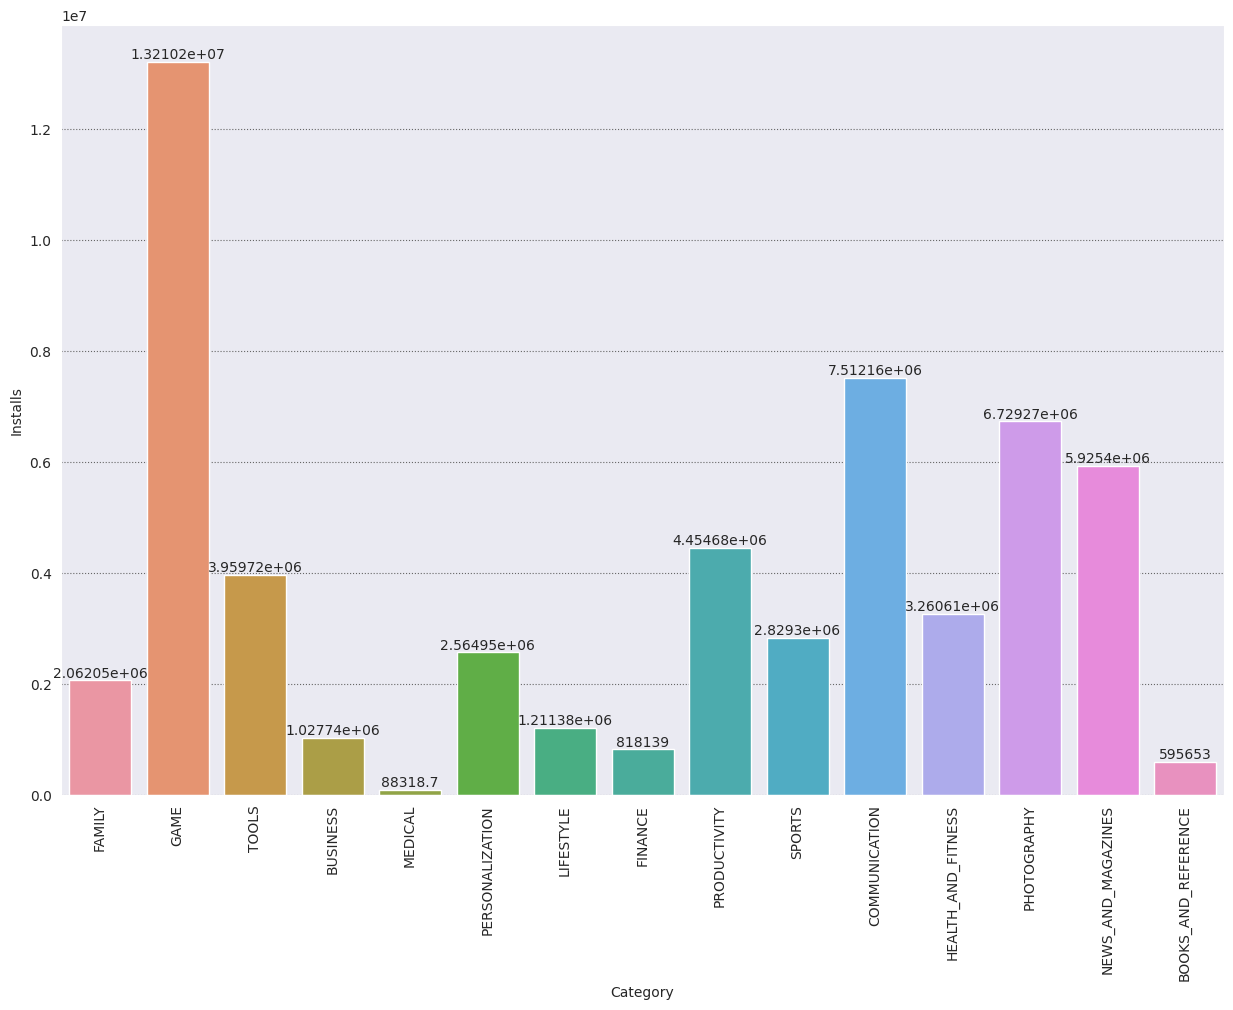

In [69]:
plt.figure(figsize=(15,10))
plot=sns.barplot(data=data,x='Category',y='Installs',order=data['Category'].value_counts().nlargest(15).index,ci=None)
plt.bar_label(plot.containers[0])
plt.xticks(rotation=90);

/tmp/ipykernel_18094/4129697362.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot=sns.barplot(data=data,x='Rating',y='Installs',order=data['Rating'].value_counts().index,ci=None)


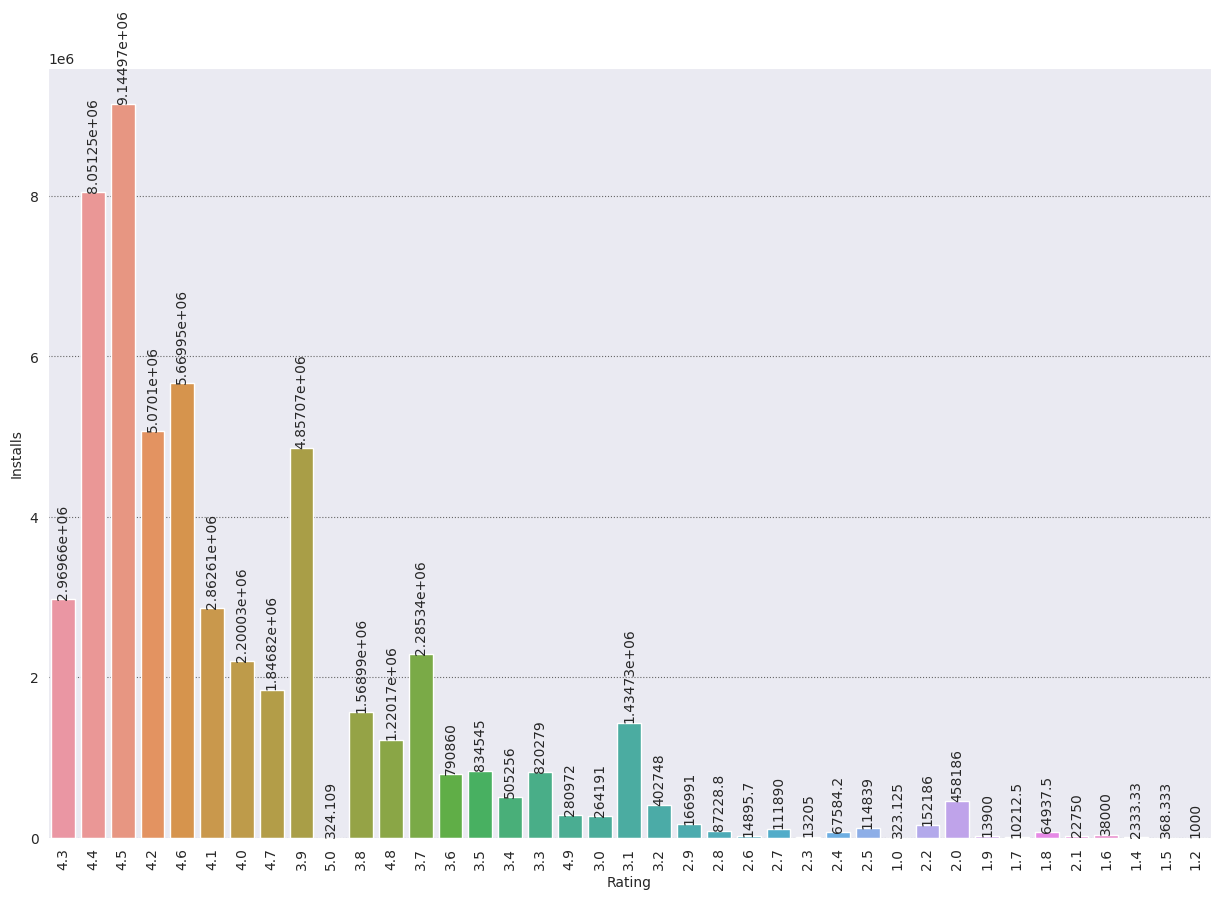

In [68]:
plt.figure(figsize=(15,10))
plot=sns.barplot(data=data,x='Rating',y='Installs',order=data['Rating'].value_counts().index,ci=None)
plt.bar_label(plot.containers[0],rotation=90)
plt.xticks(rotation=90);

In [91]:
data.groupby('Category')['Size'].max().sort_values(ascending=False).nlargest(20)

Category
HEALTH_AND_FITNESS     100000.0
FAMILY                 100000.0
SPORTS                 100000.0
MEDICAL                100000.0
LIFESTYLE              100000.0
GAME                   100000.0
FINANCE                100000.0
LIBRARIES_AND_DEMO      99000.0
TOOLS                   99000.0
PARENTING               98000.0
SHOPPING                98000.0
BUSINESS                98000.0
EDUCATION               97000.0
AUTO_AND_VEHICLES       97000.0
SOCIAL                  96000.0
PHOTOGRAPHY             96000.0
VIDEO_PLAYERS           91000.0
PERSONALIZATION         91000.0
TRAVEL_AND_LOCAL        90000.0
BOOKS_AND_REFERENCE     87000.0
Name: Size, dtype: float64

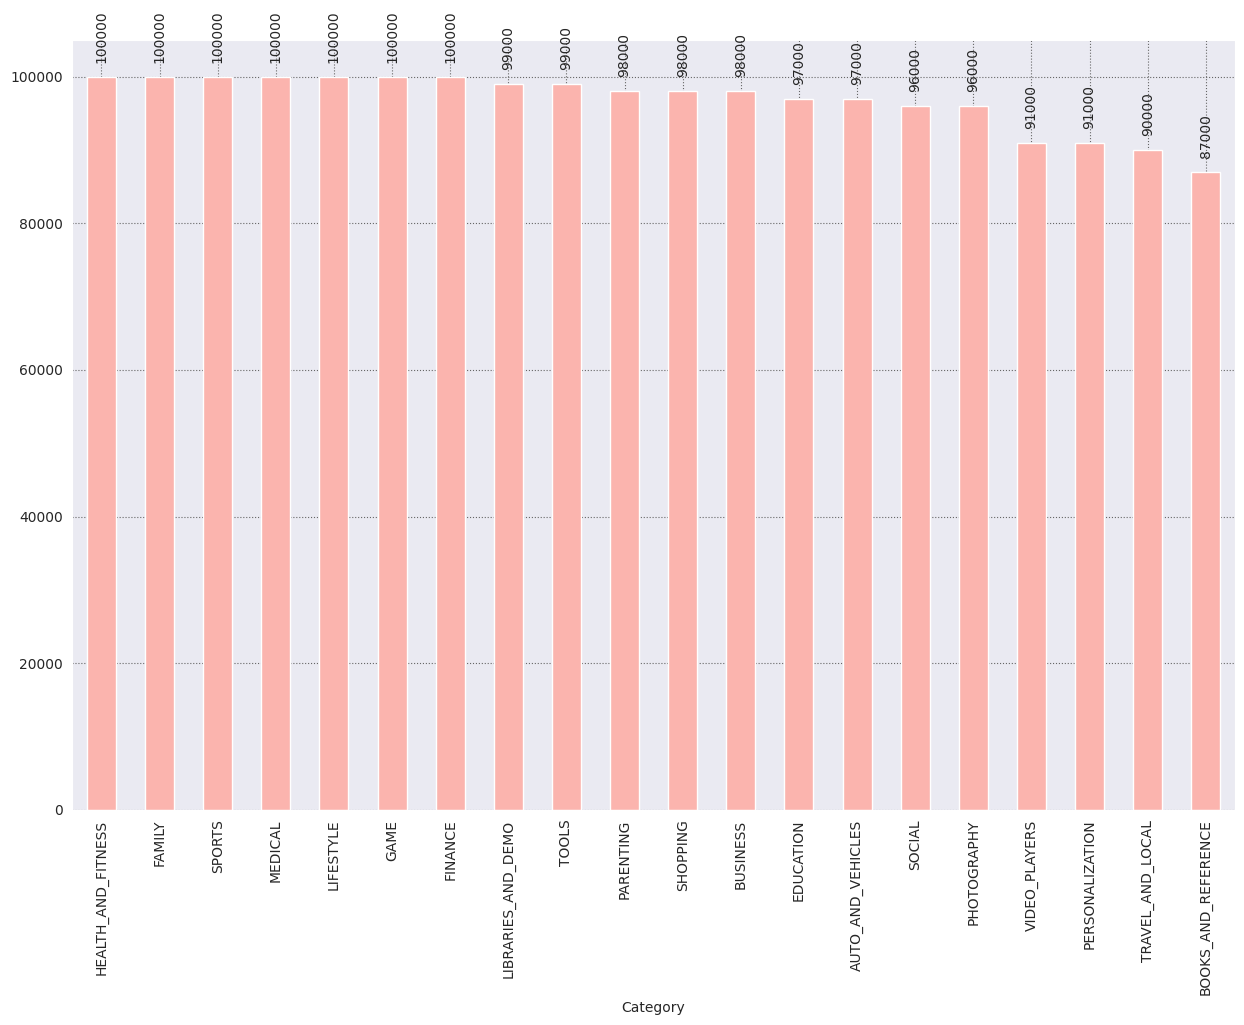

In [97]:
plt.figure(figsize=(15,10))
plot=data.groupby('Category')['Size'].max().sort_values(ascending=False).nlargest(20).plot(kind='bar',cmap=random.choice(cmaps))
plt.bar_label(plot.containers[0],padding=10,rotation=90)
plt.xticks(rotation=90);

In [81]:
a

[1080,
 1565,
 1758,
 1793,
 2299,
 4690,
 5427,
 5530,
 5862,
 5865,
 7404,
 8409,
 8847,
 9170,
 1522,
 1697,
 1713,
 1812,
 1825,
 1863]

In [ ]:
s='sdfg'


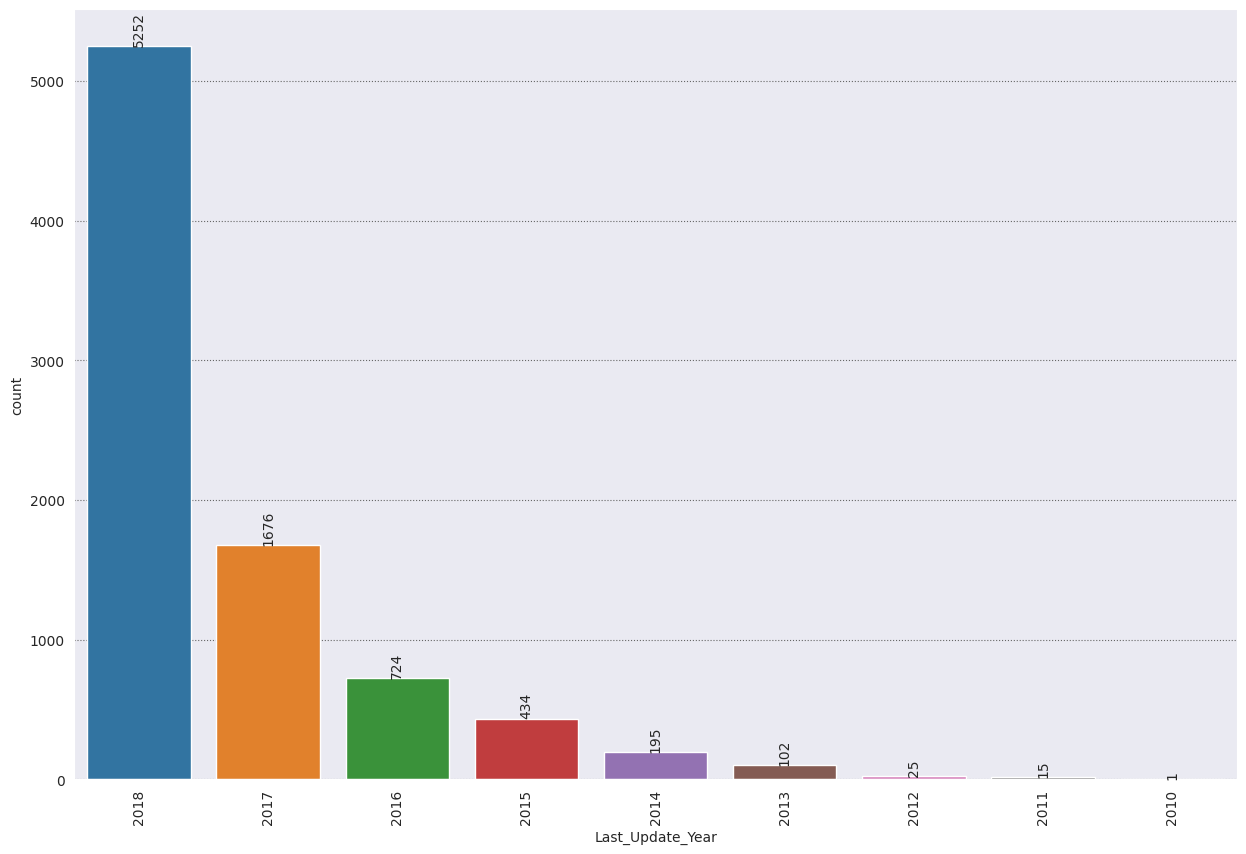

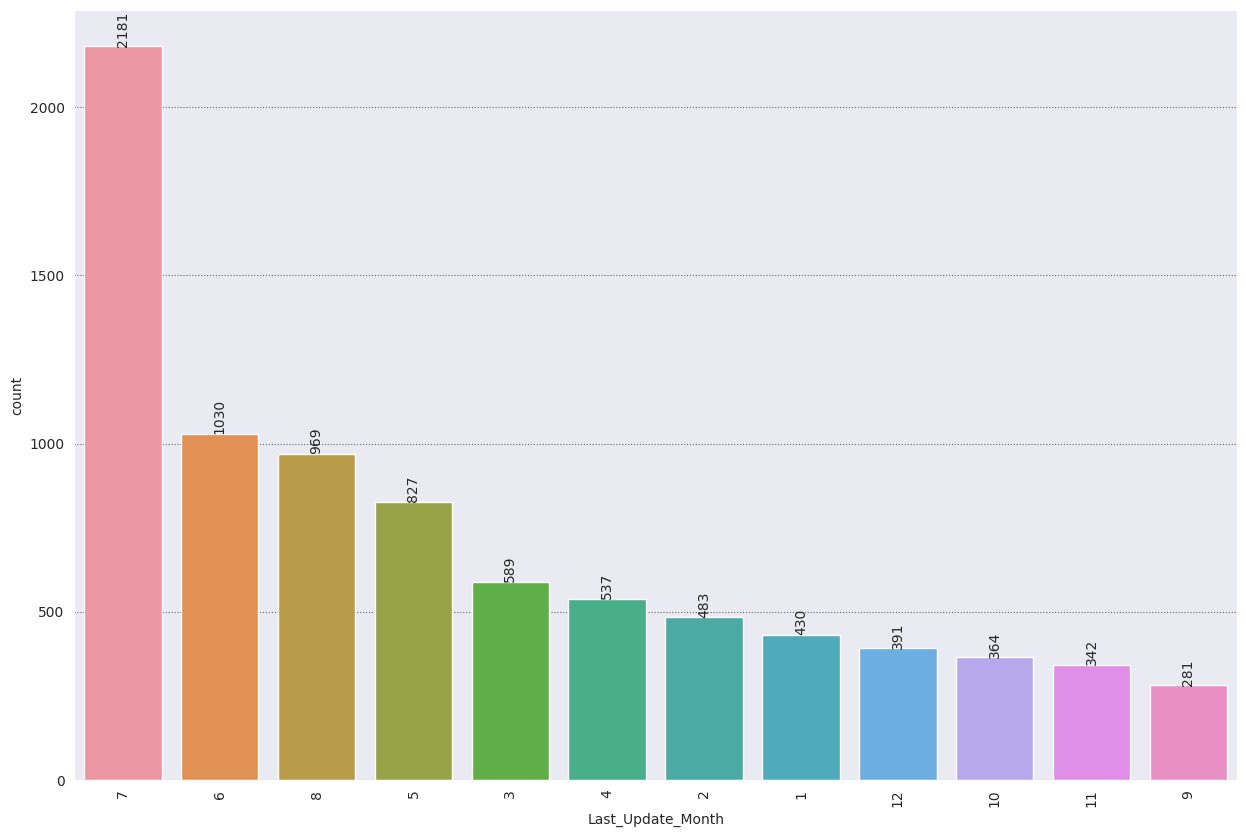

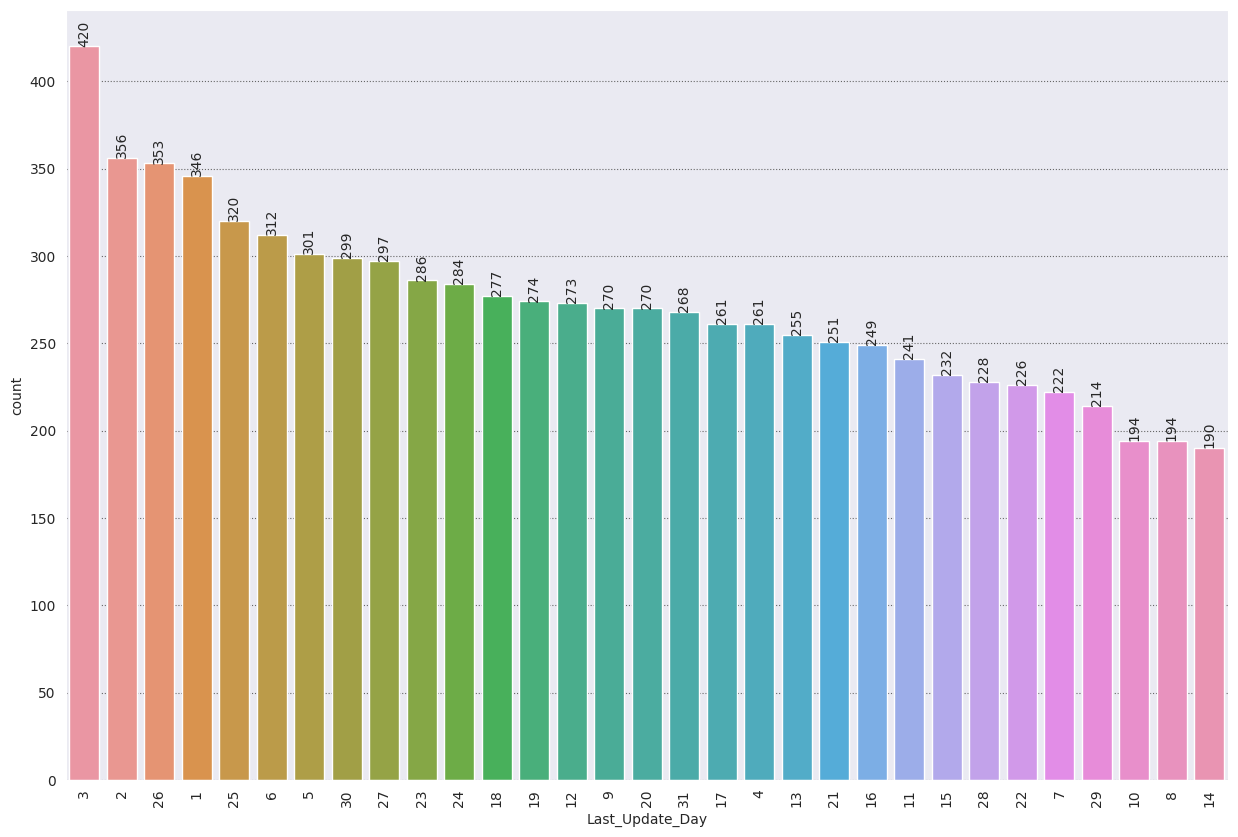

In [102]:
for i in data.columns:
    if 'Last_Up' in i:
        # sns.countplot(data=data,x=i)
        plt.figure(figsize=(15,10))
        plot=sns.countplot(data=data,x=i,order=data[i].value_counts().index,)
        plt.bar_label(plot.containers[0],rotation=90)
        plt.xticks(rotation=90);

        plt.show()

In [120]:
data.groupby(['Category','App'])['Installs'].mean()
# .sort_values(by='Installs',ascending=False).head(5)

Category        App                                              
ART_AND_DESIGN  350 Diy Room Decor Ideas                                10000.0
                3D Color Pixel by Number - Sandbox Art Coloring        100000.0
                AJ Styles HD Wallpapers                                  5000.0
                AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper        1000.0
                Ai illustrator viewer                                  100000.0
                                                                        ...    
WEATHER         Wetter by t-online.de                                 1000000.0
                Wind & Weather Meter for Ag                              1000.0
                Windguru Lite                                         1000000.0
                weather - weather forecast                            1000000.0
                wetter.com - Weather and Radar                       10000000.0
Name: Installs, Length: 8424, dtype: float64

In [132]:
temp=pd.pivot_table(data=data[['Category','App','Installs']],index=['Category','App'],aggfunc='max').reset_index()
temp[temp['Category']=='ART_AND_DESIGN']

,Category,App,Installs
0,ART_AND_DESIGN,350 Diy Room Decor Ideas,10000.0
1,ART_AND_DESIGN,3D Color Pixel by Number - Sandbox Art Coloring,100000.0
2,ART_AND_DESIGN,AJ Styles HD Wallpapers,5000.0
3,ART_AND_DESIGN,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,1000.0
4,ART_AND_DESIGN,Ai illustrator viewer,100000.0
...,...,...,...
56,ART_AND_DESIGN,X Launcher Pro - IOS Style Theme & Control Center,10000.0
57,ART_AND_DESIGN,"X Launcher Pro: PhoneX Theme, OS11 Control Center",5000.0
58,ART_AND_DESIGN,X Launcher: With OS11 Style Theme & Control Ce...,100000.0
59,ART_AND_DESIGN,ibis Paint X,10000000.0


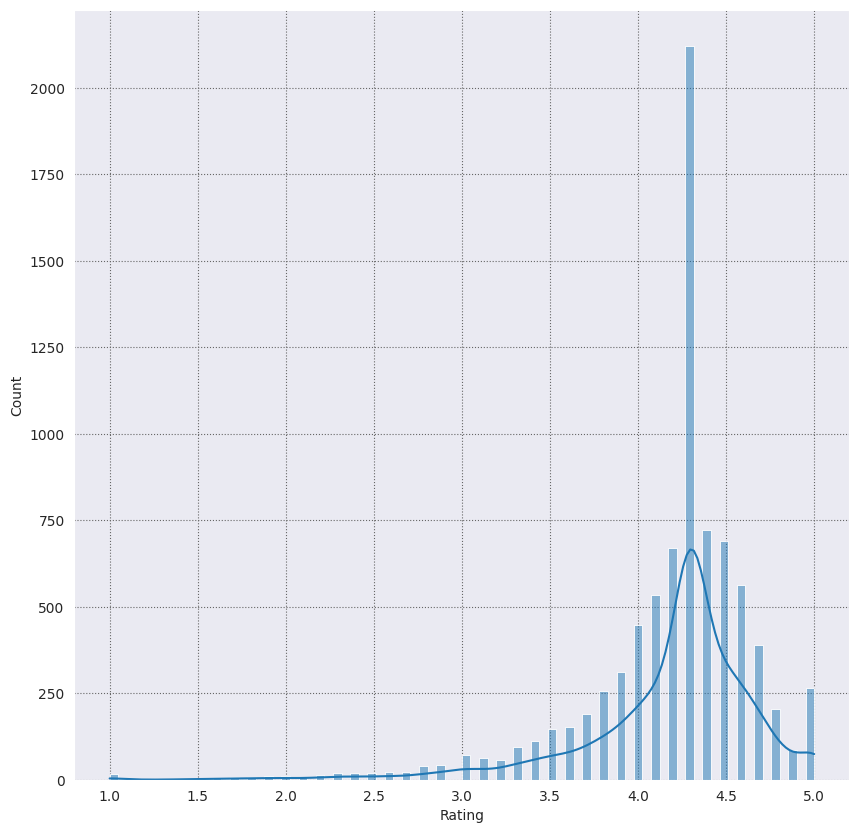

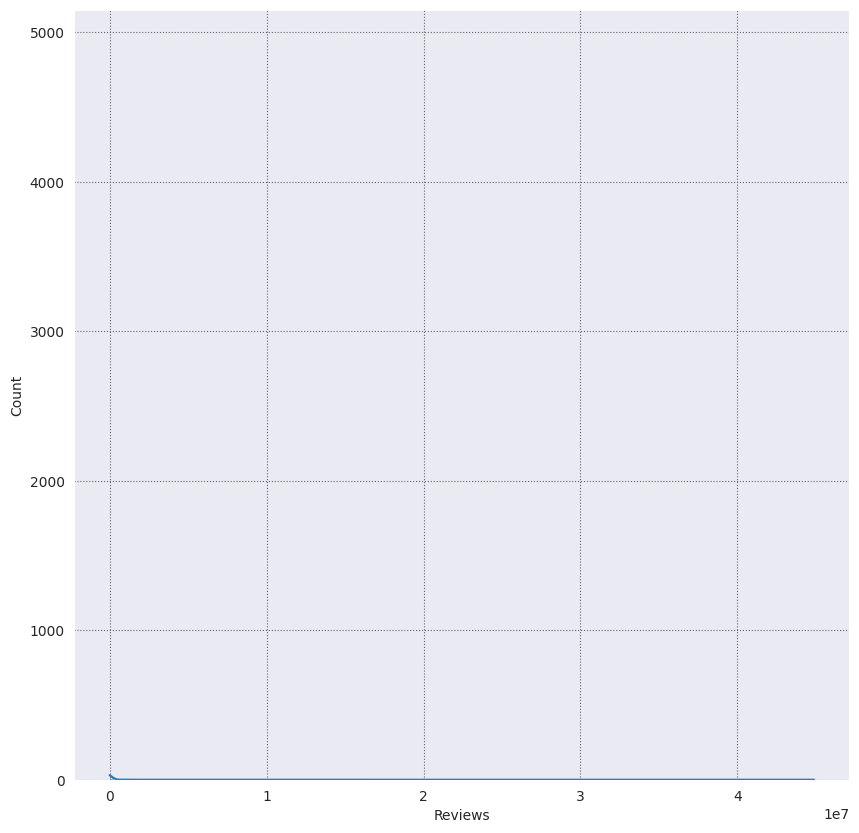

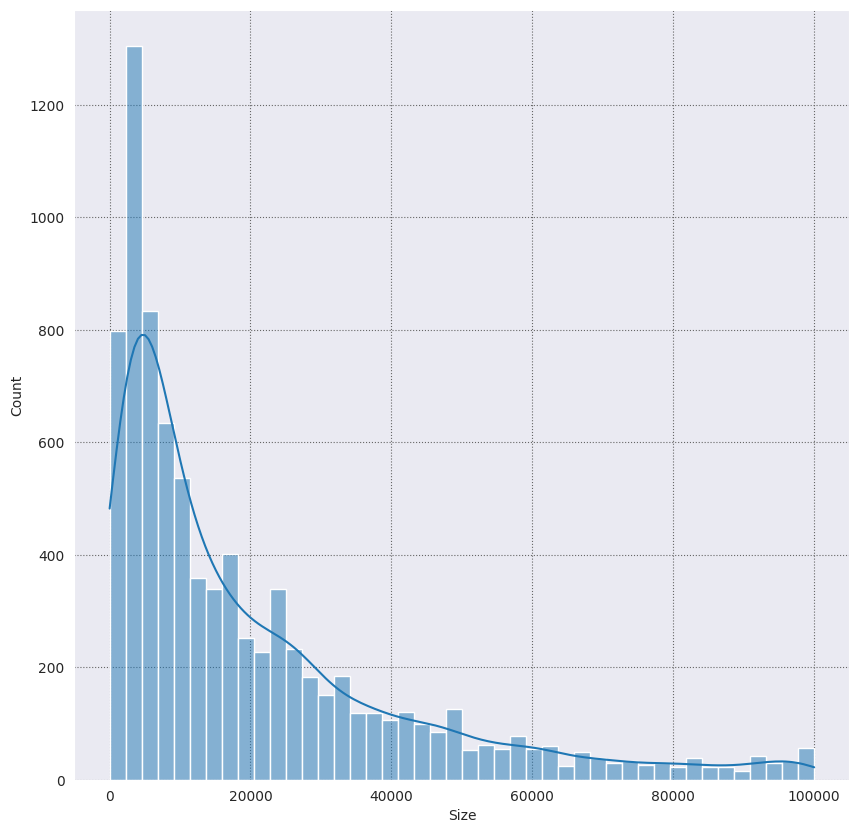

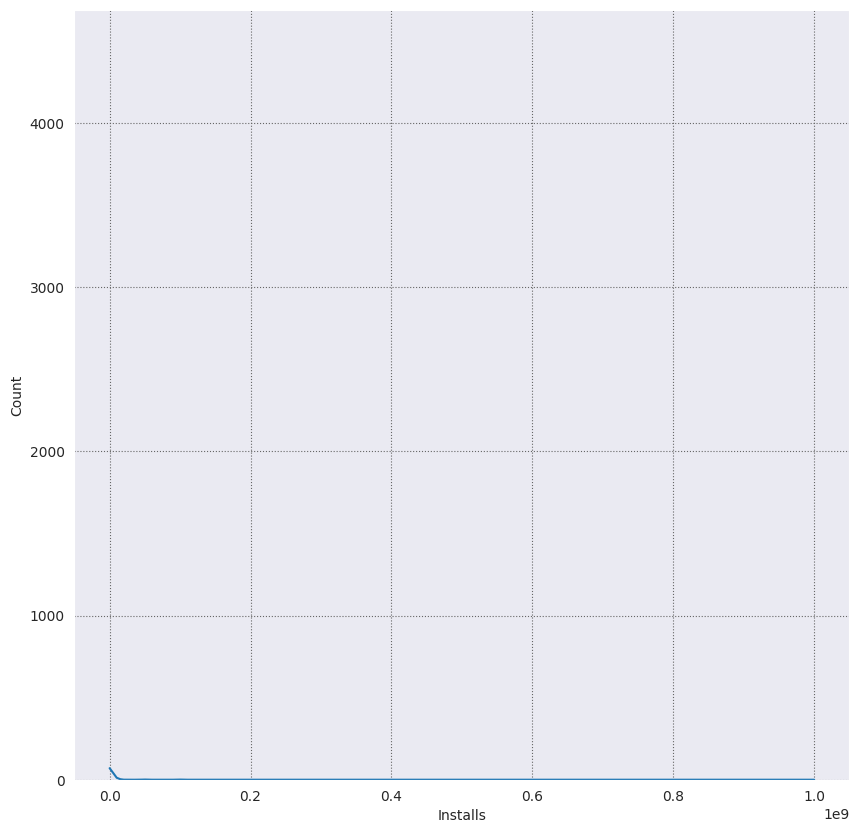

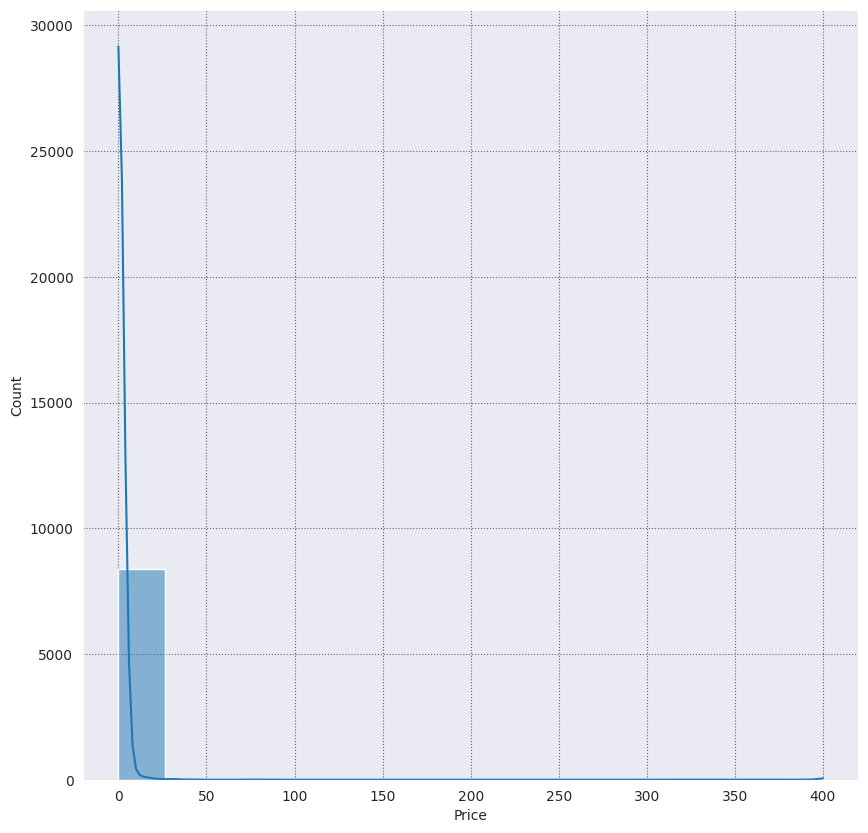

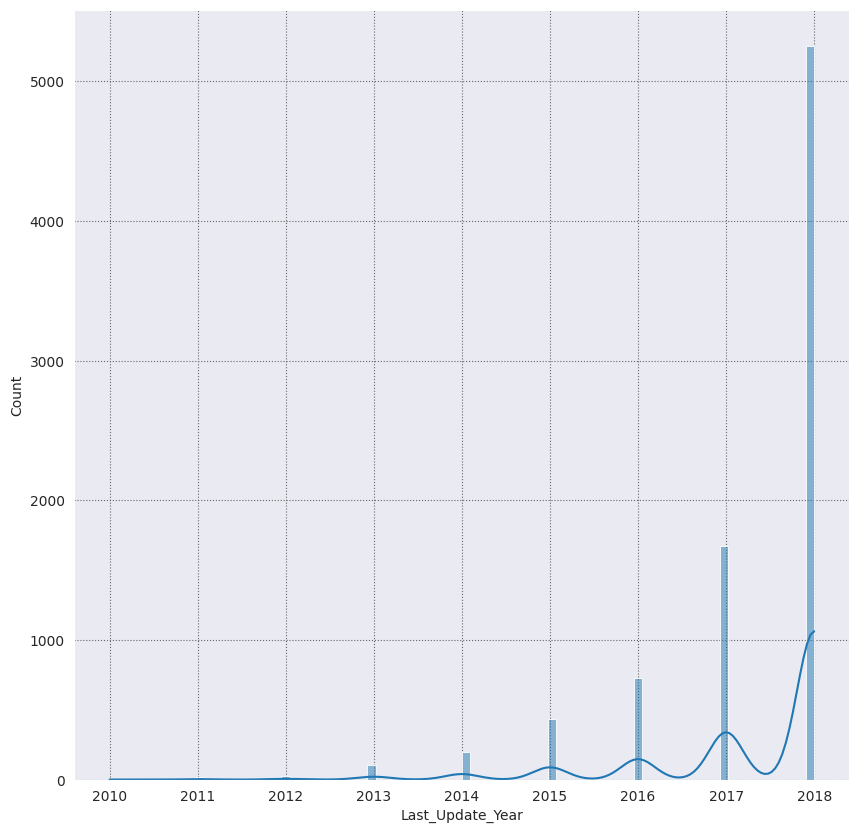

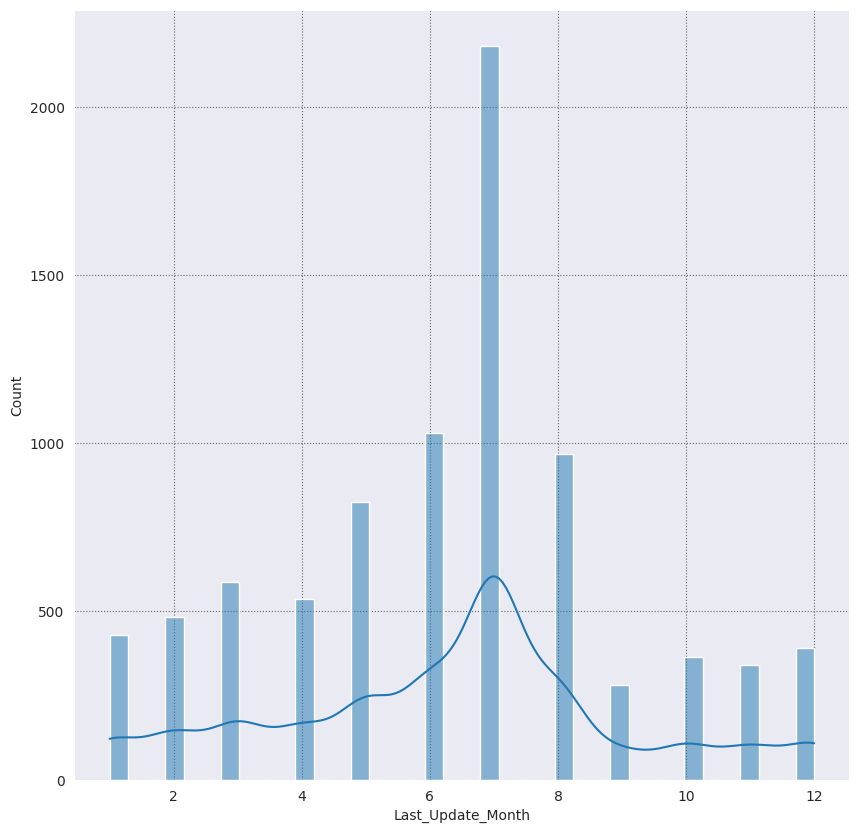

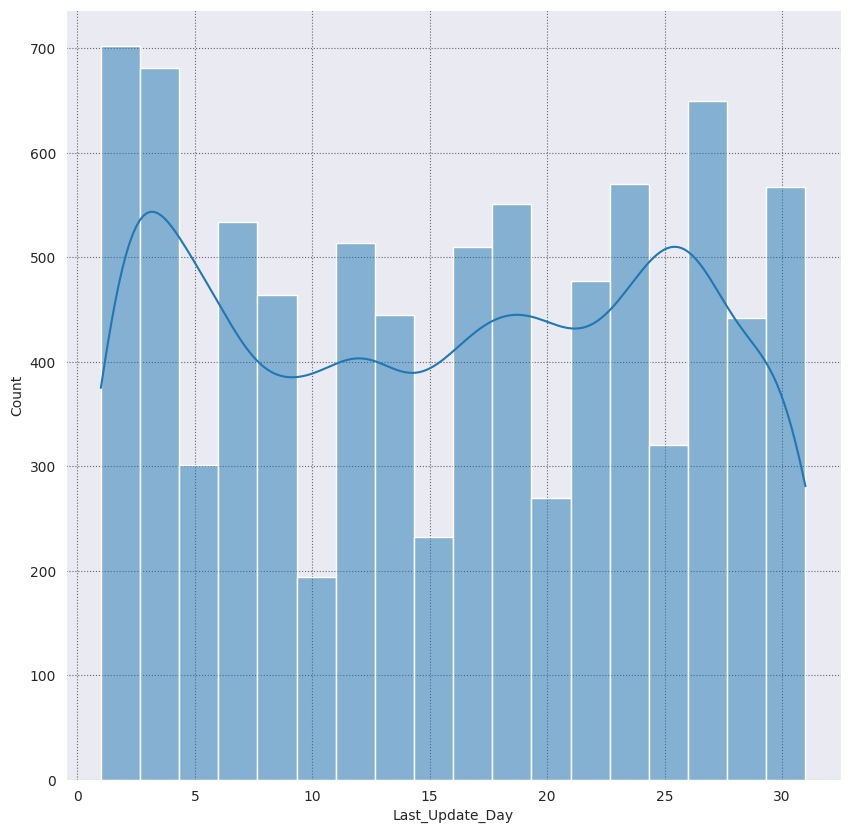

In [137]:
for i in num_cols:
    plt.figure(figsize=(10,10))
    sns.histplot(data=data,x=i,kde=True)
    plt.show()

<AxesSubplot: xlabel='Price', ylabel='Category'>

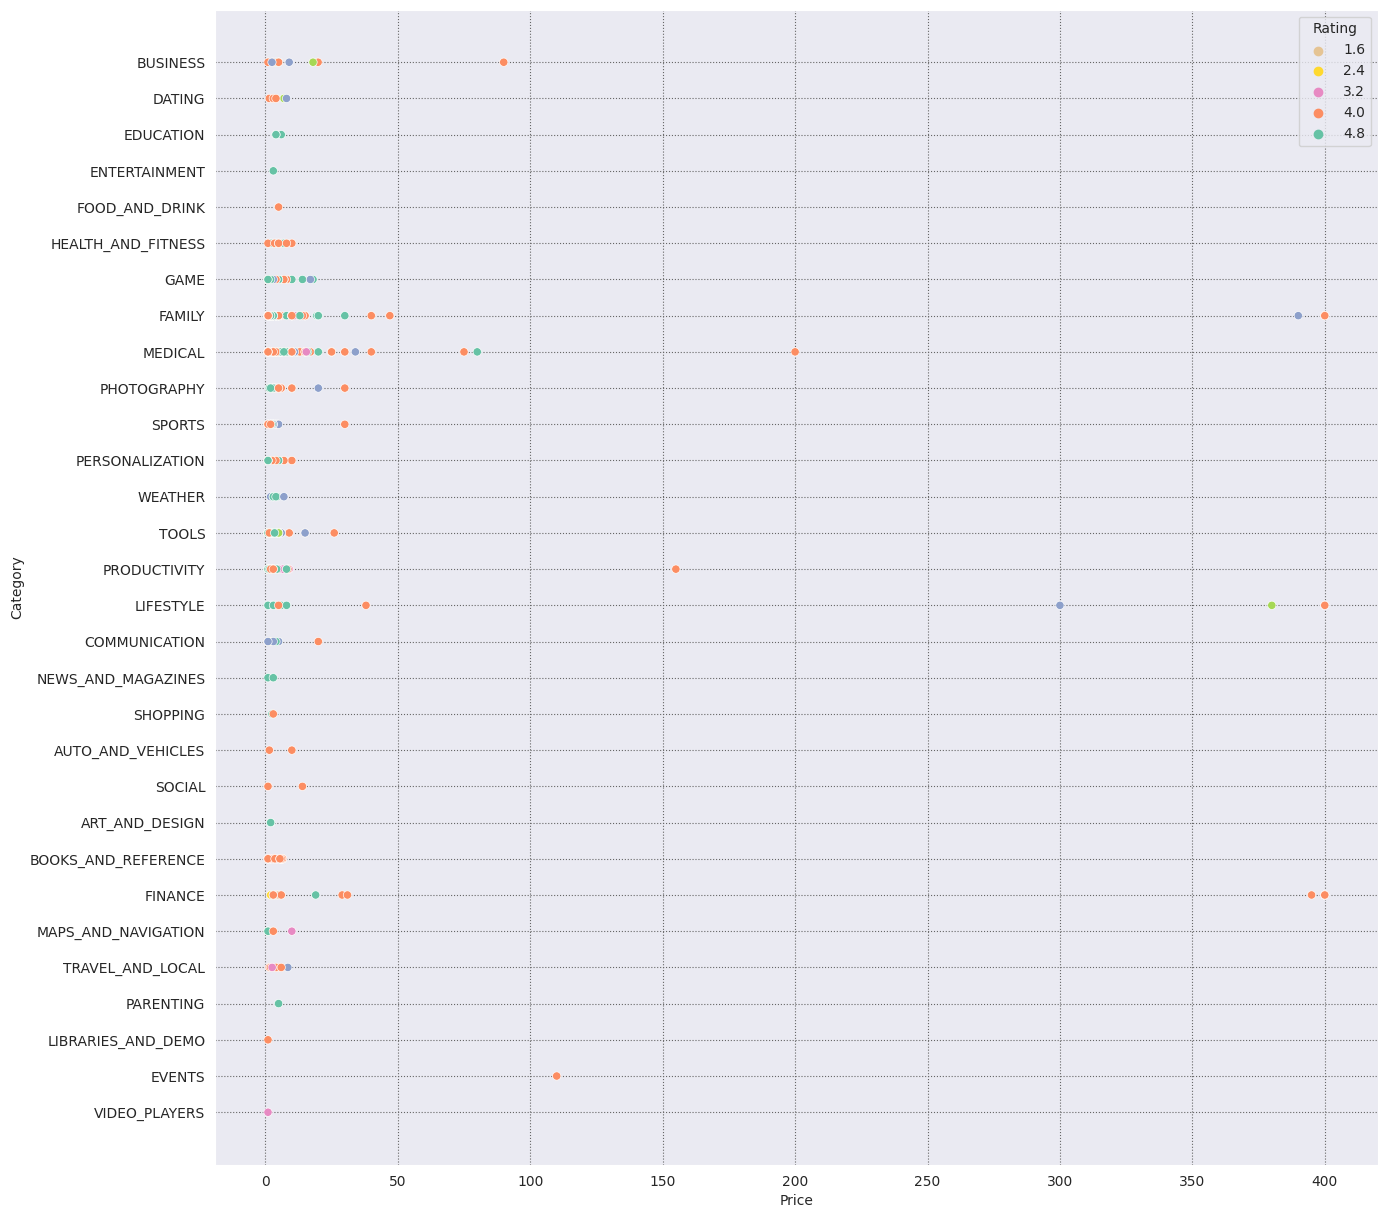

In [141]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=data[data['Type']=='Paid'],y="Category",x='Price',hue='Rating',palette=random.choice(cmaps))

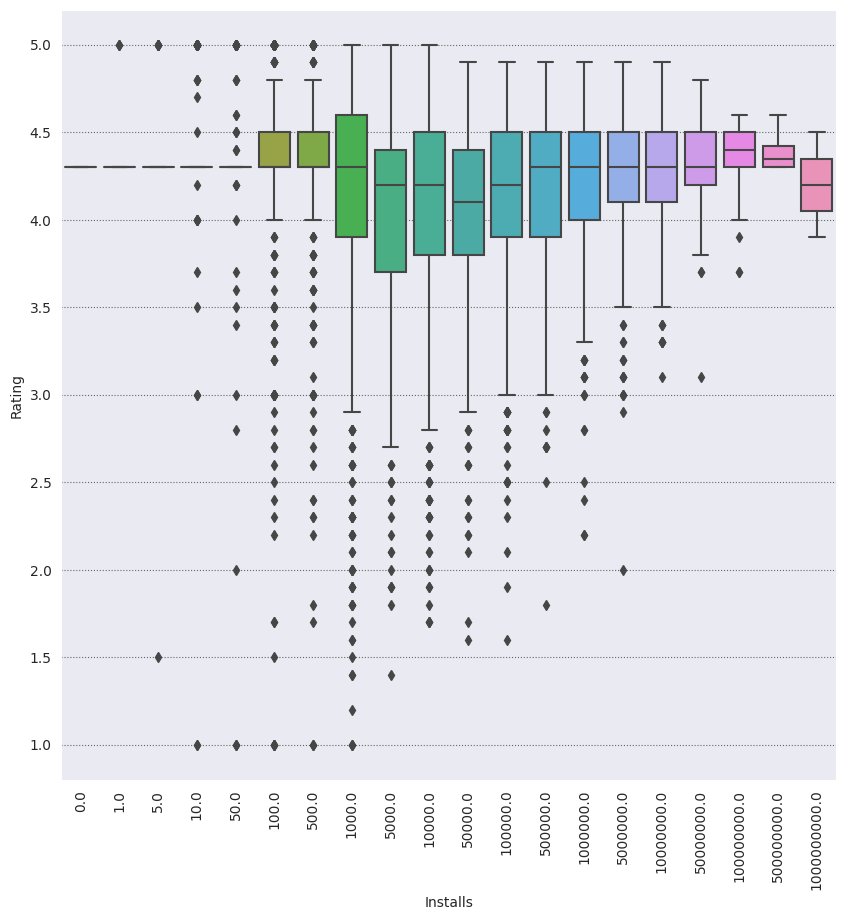

In [143]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Installs",y="Rating",data=data)
plt.xticks(rotation=90)
plt.show()

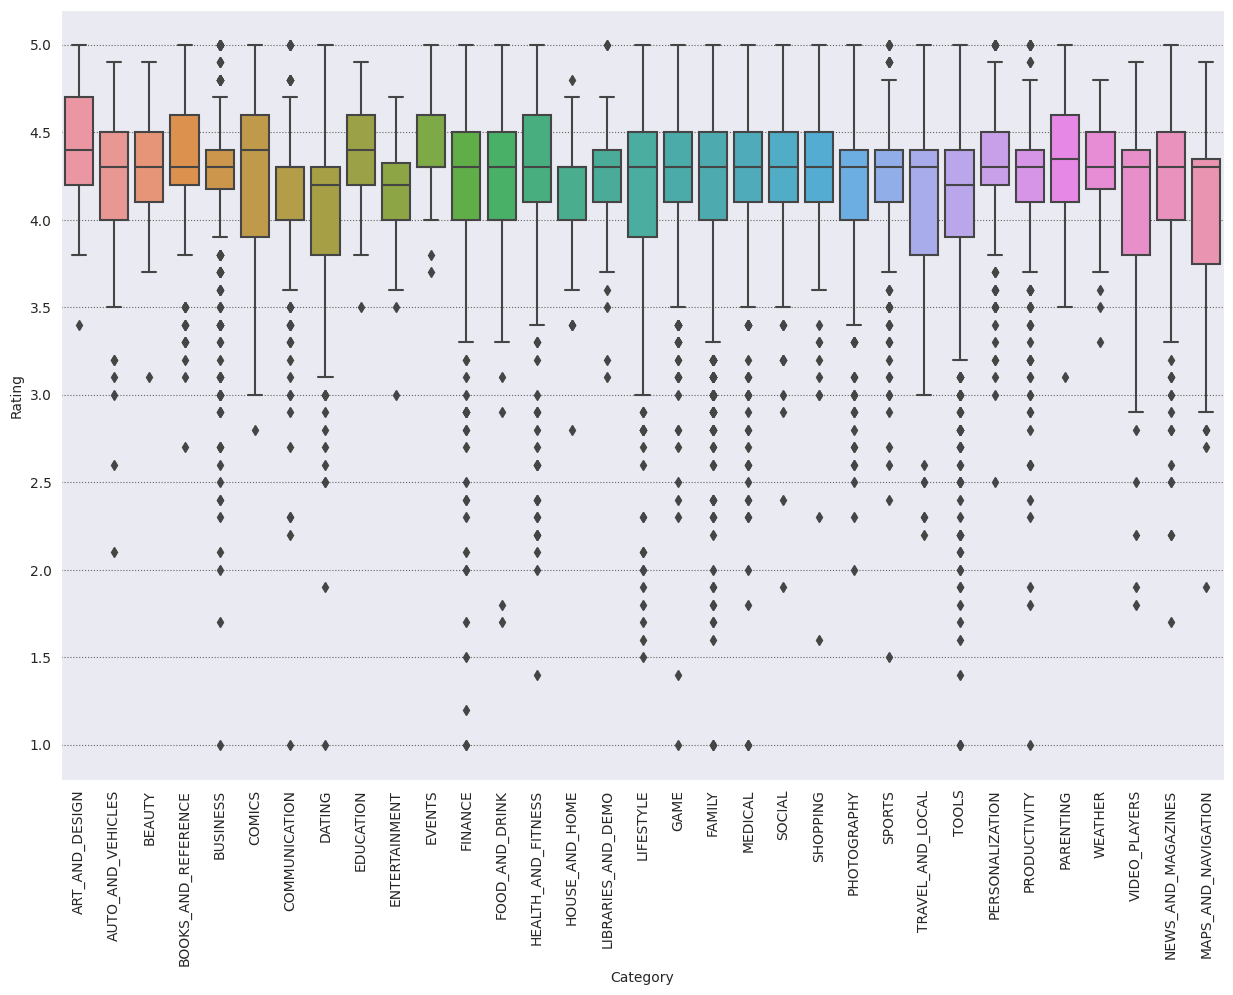

In [145]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Category",y="Rating",data=data)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: >

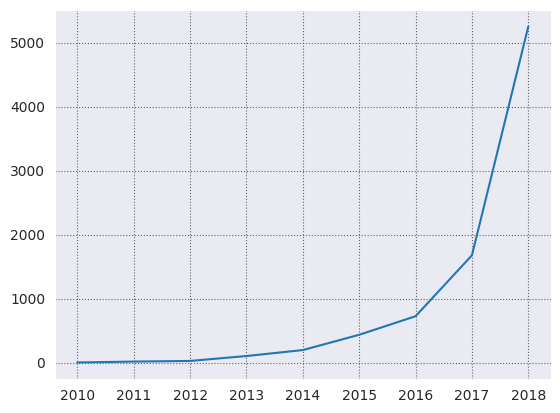

In [147]:
data['Last_Update_Year'].value_counts().plot()

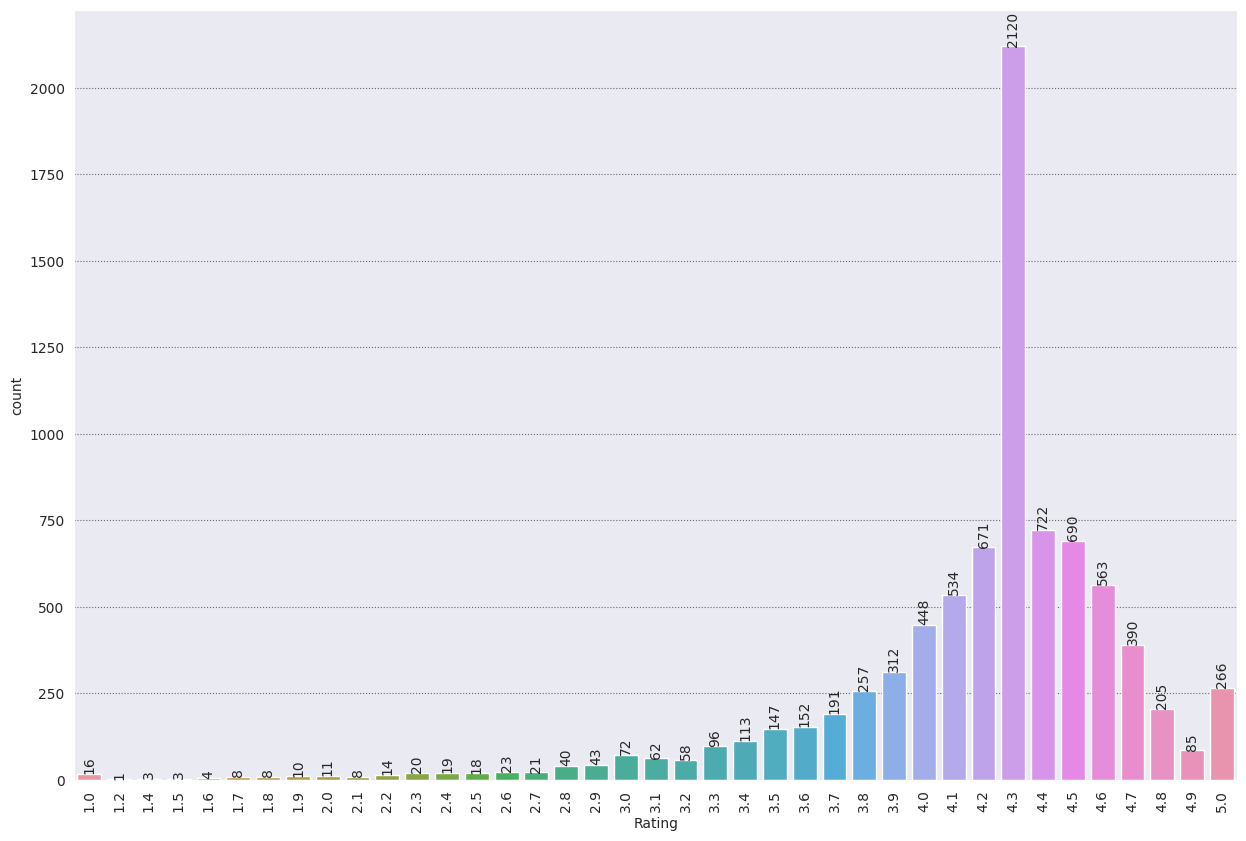

In [155]:
plt.figure(figsize=(15,10))
plot=sns.countplot(data,x='Rating')
plt.bar_label(plot.containers[0],rotation=90)
plt.xticks(rotation=90);
plt.show()